In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.ensemble import RandomForestRegressor

In [36]:
# Liste des actifs du S&P 500 (2023)
SP500_2023 = [
    "AAPL", "MSFT", "AMZN", "TSLA", "GOOGL", "GOOG", "BRK.B", "UNH", "JNJ", "XOM",
    "META", "V", "PG", "NVDA", "JPM", "HD", "CVX", "PFE", "LLY", "BAC", "TMO", "COST",
    "ABBV", "KO", "PEP", "AVGO", "MRK", "DHR", "CMCSA", "WMT", "CSCO", "ACN", "VZ", "DIS",
    "NEE", "ADBE", "NFLX", "PYPL", "ABT", "CRM", "INTC", "MCD", "MDT", "QCOM", "TXN", "UNP",
    "LLY", "BMY", "UPS", "ORCL", "LIN", "T", "BA", "SCHW", "AMGN", "PM", "RTX", "HON", "COP",
    "CAT", "BLK", "GS", "MS", "GE", "AXP", "CVS", "INTU", "WFC", "DE", "AMT", "IBM", "NOW",
    "LMT", "PLD", "SBUX", "SYK", "TGT", "MU", "ISRG", "MDLZ", "MO", "GILD", "TJX", "SO", "BKNG",
    "PNC", "USB", "CI", "SPGI", "MMC", "F", "CB", "BDX", "CL", "CCI", "ADP", "GM", "CSX", "DUK",
    "ZTS", "AMAT", "EL", "SHW", "ITW", "EW", "EMR", "ETN", "NSC", "GD", "WM", "FIS", "ANTM", "ECL",
    "LRCX", "NOC", "HUM", "D", "DG", "ADSK", "FCX", "MCO", "PSA", "ICE", "ROP", "AON", "APD", "MSCI",
    "SNPS", "CTSH", "BSX", "BAX", "CHTR", "CME", "PGR", "AIG", "IDXX", "ATVI", "REGN", "AEP", "EQIX",
    "ILMN", "STZ", "SLB", "TEL", "IQV", "SRE", "BIIB", "MAR", "BK", "DLR", "PH", "DXCM", "EA", "MNST",
    "AFL", "PAYX", "MCHP", "O", "PRU", "APTV", "CDNS", "ROST", "FISV", "TT", "CLX", "ALGN", "WBA", "EXC"
]


# Périmètre d'analyse :
start_date = '2007-01-01'
end_date = '2024-01-01'
df = yf.download(SP500_2023, start=start_date, end=end_date)["Close"]
df.head()

/opt/mamba/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/opt/mamba/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/opt/mamba/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/opt/mamba/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timede

Ticker,AAPL,ABBV,ABT,ACN,ADBE,ADP,ADSK,AEP,AFL,AIG,...,UPS,USB,V,VZ,WBA,WFC,WM,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,NaN,23.495806,36.380001,39.919998,38.392235,40.560001,42.849998,23.125000,1443.000000,...,74.970001,36.169998,NaN,35.306732,46.070000,35.740002,37.029999,47.549999,74.110001,NaN
2007-01-04,3.059286,NaN,23.942020,37.200001,40.820000,38.780834,41.330002,42.840000,22.870001,1430.199951,...,75.089996,36.200001,NaN,35.502777,46.160000,35.799999,36.570000,47.779999,72.720001,NaN
2007-01-05,3.037500,NaN,23.942020,36.680000,40.619999,38.669804,41.930000,42.040001,22.900000,1423.599976,...,74.150002,35.770000,NaN,34.895969,45.500000,35.599998,35.980000,47.389999,73.239998,NaN
2007-01-08,3.052500,NaN,24.028383,37.209999,40.450001,38.693596,41.799999,42.009998,22.915001,1430.599976,...,74.379997,35.650002,NaN,34.363850,45.689999,35.500000,36.070000,47.000000,72.650002,NaN
2007-01-09,3.306071,NaN,24.239496,37.119999,39.630001,38.542915,42.320000,42.410000,23.000000,1425.800049,...,74.080002,35.630001,NaN,34.503880,45.930000,35.590000,35.689999,47.389999,72.089996,NaN


In [37]:
df.shape

(4278, 167)

In [38]:
#On supprime les actifs avec des NaN
df = df.dropna(axis=1)
# On créer une matrice de rendement (plus intéressant) 
data_return = df.pct_change()
data_return.dropna(inplace=True)

In [53]:
data_return.shape

(4277, 147)


Statistiques descriptives pour AAPL :
count                  4277.000000
mean                      0.001175
std                       0.020018
min                      -0.179195
25%                      -0.008067
50%                       0.001000
75%                       0.011500
max                       0.139049
Médiane                  26.965000
Écart interquartile      44.561249
Name: AAPL, dtype: float64

Statistiques descriptives pour UPS :
count                  4277.000000
mean                      0.000294
std                       0.015550
min                      -0.099872
25%                      -0.006639
50%                       0.000180
75%                       0.007313
max                       0.143758
Médiane                 100.340000
Écart interquartile      44.269999
Name: UPS, dtype: float64

Statistiques descriptives pour ABT :
count                  4277.000000
mean                      0.000461
std                       0.014112
min                      -0

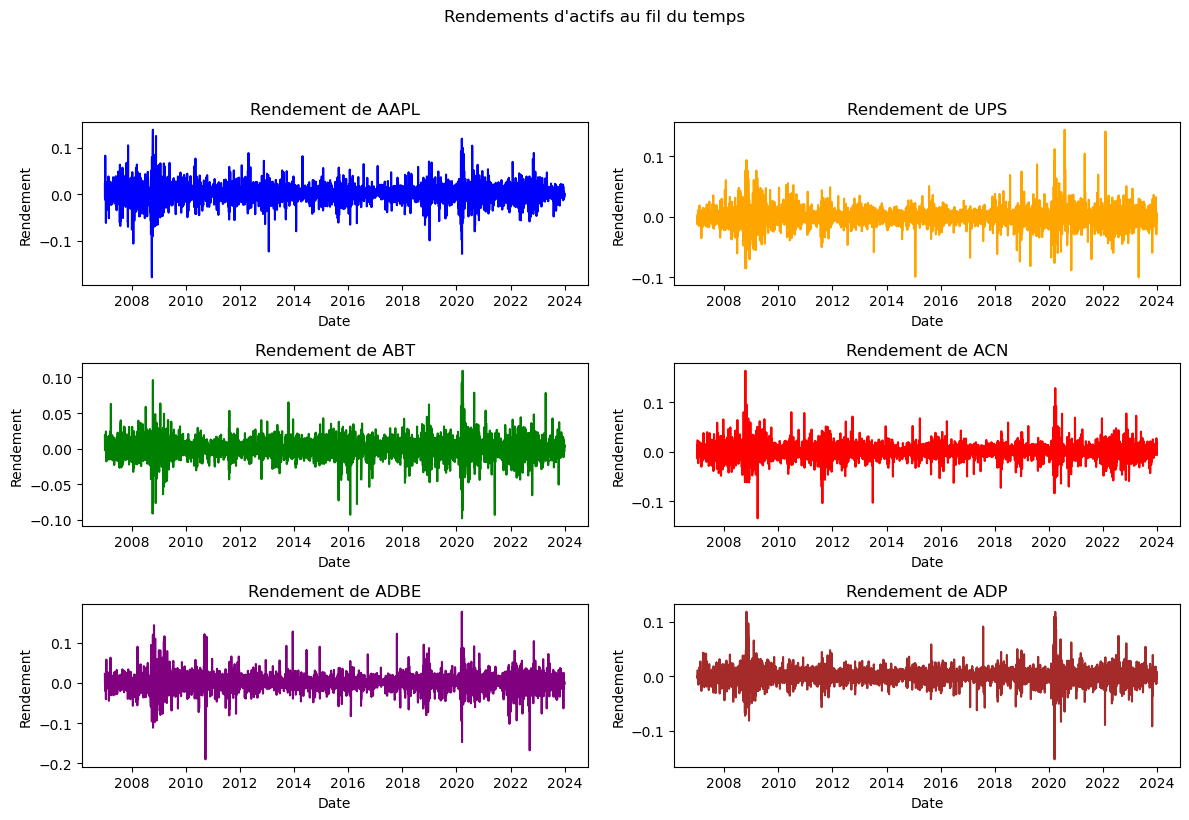

In [40]:
# Sélection des actifs pour les statistiques descriptives
actifs = ["AAPL", "UPS", "ABT", "ACN", "ADBE", "ADP"]

# Nombre total d'actifs
num_actifs = len(actifs)

# Nombre de colonnes dans la grille de sous-graphiques
num_cols = 2

# Nombre de lignes nécessaires pour afficher tous les actifs
num_rows = (num_actifs + num_cols - 1) // num_cols

# Création de sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Rendements d\'actifs au fil du temps', y=1.02)

# Liste de couleurs personnalisées pour chaque actif
custom_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Afficher chaque actif individuellement dans un sous-graphique
for i, (actif, custom_color) in enumerate(zip(actifs, custom_colors)):
    row = i // num_cols
    col = i % num_cols

    # Statistiques descriptives pour l'actif en cours
    descriptive_stats = data_return[actif].describe()

    # Ajout d'autres statistiques personnalisées si nécessaire
    mediane = df[actif].median()
    ecart_interquartile = df[actif].quantile(0.75) - df[actif].quantile(0.25)

    descriptive_stats['Médiane'] = mediane
    descriptive_stats['Écart interquartile'] = ecart_interquartile

    # Affichage du tableau de statistiques descriptives
    print(f"\nStatistiques descriptives pour {actif} :\n{descriptive_stats}")

    # Affichage du rendement d'actif au fil du temps dans un sous-graphique avec couleur personnalisée
    axes[row, col].plot(data_return.index, data_return[actif], color=custom_color)
    axes[row, col].set_title(f'Rendement de {actif}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Rendement')

# Ajustements de la mise en page
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

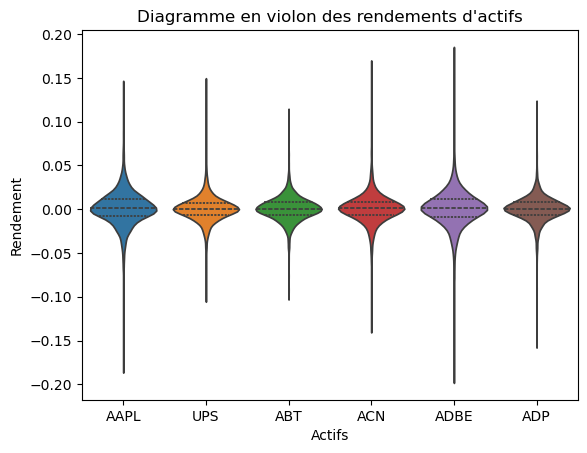

In [44]:
sns.violinplot(data=data_return[actifs], inner='quartile')
plt.title('Diagramme en violon des rendements d\'actifs')
plt.xlabel('Actifs')
plt.ylabel('Rendement')
plt.show()

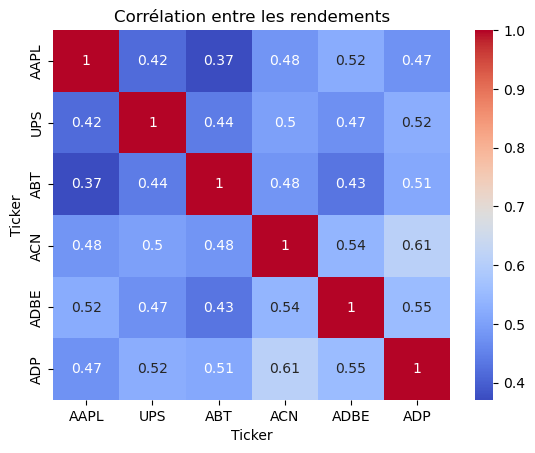

In [45]:
sns.heatmap(data_return[actifs].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre les rendements')
plt.show()

In [46]:
# Création d'une fonction qui calcule la causalité de granger avec les actifs deux à deux : 
def create_granger_causality_matrix_np(df, maxlag=1, significance_level=0.05):
    np_data = df.to_numpy().T  # Transposée

    # Initialisation de la matrice d'adjacence
    n = np_data.shape[0]
    adjacency_matrix = np.zeros((n, n), dtype=int)
    
    # Test de Granger se basant sur la p-value: 
    for i in range(n):
        for j in range(n):
            if i != j:
                test_result = grangercausalitytests(np.column_stack([np_data[i], np_data[j]]), maxlag=maxlag, verbose=False) # test granger causalité : entre actif i et j en fonction du temps /regression 
                p_value = test_result[1][0]['ssr_chi2test'][1] #on extrait les resultats de p-value pour le premier lag = significativité de test_result
                adjacency_matrix[i, j] = 1 if p_value < significance_level else 0 #mettre 1 dans matrice adjacence si les 2 paires d'actifs sont significative (regression diff pour chaque actif)


    return adjacency_matrix

In [47]:
#Création des cluster basées sur la matrice d'adjacence et Granger :
def clust_corr(adjac):
    n = adjac.shape[0] 
    out = np.zeros((1, n))
    vectU = np.ones((n, 1))

    for i in range(n):
        actif = adjac[i, :]  
        sum = np.dot(actif, vectU)
        dout = sum * (sum - 1)
        T = np.dot(np.dot(adjac, adjac), adjac.T)
        coeff = (T[i, i] / dout) if dout != 0 else 0
        out[0, i] = coeff

    return out

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-01-01 à 2020-01-31, Actifs sélectionnés: ['CB', 'TT', 'WBA'], NB Actifs sélectionnés: 3
gain_actif Ticker
CB     1.074742
TT     1.081663
WBA    1.050541
dtype: float64
Capital après investissement pour la période 2020-01-31 à 2020-02-10: 1068.98
Ratio de Sharpe pour tous les actifs à la période 2020-01-31 à 2020-02-10 : 0.41


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-02-10 à 2020-03-11, Actifs sélectionnés: ['CME', 'CVS', 'DLR', 'DXCM', 'LLY', 'PSA', 'WMT'], NB Actifs sélectionnés: 7
gain_actif Ticker
CME     0.813694
CVS     0.892187
DLR     0.884672
DXCM    0.829966
LLY     0.874161
PSA     0.776719
WMT     0.995980
dtype: float64
Capital après investissement pour la période 2020-03-11 à 2020-03-21: 926.56
Ratio de Sharpe pour tous les actifs à la période 2020-03-11 à 2020-03-21 : -0.19


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-03-21 à 2020-04-20, Actifs sélectionnés: ['ADP', 'AFL', 'AMT', 'AMZN', 'AXP', 'BAX', 'BDX', 'BIIB', 'BMY', 'CAT', 'CCI', 'CI', 'CL', 'CMCSA', 'COP', 'CVS', 'CVX', 'DE', 'EQIX', 'GE', 'GS', 'HUM', 'KO', 'LLY', 'LMT', 'MNST', 'MO', 'NFLX', 'O', 'PAYX', 'PFE', 'PNC', 'PSA', 'QCOM', 'ROP', 'SCHW', 'TT', 'XOM'], NB Actifs sélectionnés: 38
gain_actif Ticker
ADP      1.049135
AFL      1.030152
AMT      0.957053
AMZN     1.033585
AXP      1.086180
BAX      0.943064
BDX      0.958586
BIIB     0.874547
BMY      0.985895
CAT      1.015532
CCI      0.981591
CI       1.037520
CL       0.973808
CMCSA    1.011287
COP      1.217819
CVS      0.987328
CVX      1.100874
DE       1.056519
EQIX     1.006634
GE       1.044547
GS       1.016741
HUM      1.039447
KO       0.986245
LLY      0.980037
LMT      1.015266
MNST     1.007006
MO       1.004607
NFLX     0.959679
O        1.079615
PAYX     1.030996
PFE      1.063193
PNC      1.040175
PSA      0.959290
QCOM     1.058673
ROP      1

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-04-30 à 2020-05-30, Actifs sélectionnés: ['AON', 'BIIB', 'CVX', 'MDT', 'PG', 'PGR', 'REGN'], NB Actifs sélectionnés: 7
gain_actif Ticker
AON     0.990568
BIIB    0.974424
CVX     1.094191
MDT     1.020595
PG      1.009296
PGR     1.034210
REGN    1.015214
dtype: float64
Capital après investissement pour la période 2020-05-30 à 2020-06-09: 965.90
Ratio de Sharpe pour tous les actifs à la période 2020-05-30 à 2020-06-09 : -0.11


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-06-09 à 2020-07-09, Actifs sélectionnés: ['ADP', 'AEP', 'AMT', 'AMZN', 'BKNG', 'BSX', 'CAT', 'CB', 'CCI', 'CL', 'CMCSA', 'CTSH', 'DIS', 'EW', 'FIS', 'HON', 'HUM', 'ISRG', 'JNJ', 'MDT', 'NSC', 'PAYX', 'PH', 'PSA', 'TGT', 'TT', 'UNP', 'VZ', 'WM'], NB Actifs sélectionnés: 29
gain_actif Ticker
ADP      1.012832
AEP      1.066935
AMT      0.975565
AMZN     0.930667
BKNG     1.037066
BSX      1.093043
CAT      1.088841
CB       1.093373
CCI      0.984329
CL       1.025641
CMCSA    1.073556
CTSH     1.111252
DIS      1.015752
EW       1.085702
FIS      1.034465
HON      1.096414
HUM      1.056330
ISRG     1.132766
JNJ      1.048144
MDT      1.093754
NSC      1.101457
PAYX     1.008370
PH       1.049002
PSA      0.984286
TGT      1.031976
TT       1.134677
UNP      1.091933
VZ       1.043752
WM       1.064851
dtype: float64
Capital après investissement pour la période 2020-07-09 à 2020-07-19: 1018.08
Ratio de Sharpe pour tous les actifs à la période 2020-07-09 à 2020-07

/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-07-19 à 2020-08-18, Actifs sélectionnés: ['MCHP', 'PFE', 'PG', 'PLD', 'VZ'], NB Actifs sélectionnés: 5
gain_actif Ticker
MCHP    1.029530
PFE     0.988269
PG      1.016556
PLD     0.988808
VZ      1.001352
dtype: float64
Capital après investissement pour la période 2020-08-18 à 2020-08-28: 1023.07
Ratio de Sharpe pour tous les actifs à la période 2020-08-18 à 2020-08-28 : 0.18


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-08-28 à 2020-09-27, Actifs sélectionnés: ['ALGN', 'BKNG', 'CME', 'DUK', 'LMT', 'NEE', 'PSA'], NB Actifs sélectionnés: 7
gain_actif Ticker
ALGN    1.002354
BKNG    1.034374
CME     1.003374
DUK     1.101726
LMT     0.980615
NEE     1.045682
PSA     1.040293
dtype: float64
Capital après investissement pour la période 2020-09-27 à 2020-10-07: 1053.54
Ratio de Sharpe pour tous les actifs à la période 2020-09-27 à 2020-10-07 : 0.02


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-10-07 à 2020-11-06, Actifs sélectionnés: ['F', 'T', 'WFC'], NB Actifs sélectionnés: 3
gain_actif Ticker
F      1.129653
T      1.055758
WFC    1.136467
dtype: float64
Capital après investissement pour la période 2020-11-06 à 2020-11-16: 1166.57
Ratio de Sharpe pour tous les actifs à la période 2020-11-06 à 2020-11-16 : 0.79


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-11-16 à 2020-12-16, Actifs sélectionnés: ['ABT', 'ADP', 'CLX', 'COP', 'CVX', 'EA', 'EQIX', 'JPM', 'MCO', 'NVDA', 'O', 'PSA', 'SYK'], NB Actifs sélectionnés: 13
gain_actif Ticker
ABT     1.009409
ADP     1.005524
CLX     1.001770
COP     0.933129
CVX     0.962115
EA      1.001483
EQIX    1.022820
JPM     1.031905
MCO     0.994047
NVDA    0.981216
O       0.995762
PSA     1.012790
SYK     1.008208
dtype: float64
Capital après investissement pour la période 2020-12-16 à 2020-12-26: 1163.00
Ratio de Sharpe pour tous les actifs à la période 2020-12-16 à 2020-12-26 : 0.18


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2020-12-26 à 2021-01-25, Actifs sélectionnés: ['CTSH', 'KO', 'MCD', 'PSA', 'SO', 'SYK'], NB Actifs sélectionnés: 6
gain_actif Ticker
CTSH    0.933275
KO      1.004715
MCD     0.989172
PSA     1.022274
SO      0.988856
SYK     0.989689
dtype: float64
Capital après investissement pour la période 2021-01-25 à 2021-02-04: 1149.04
Ratio de Sharpe pour tous les actifs à la période 2021-01-25 à 2021-02-04 : -0.27


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-02-04 à 2021-03-06, Actifs sélectionnés: ['APD', 'EL', 'IBM', 'ICE', 'KO', 'LMT', 'LRCX', 'MDT', 'NOC', 'SPGI', 'UNP'], NB Actifs sélectionnés: 11
gain_actif Ticker
APD     1.028590
EL      1.031599
IBM     1.027482
ICE     1.008089
KO      0.991867
LMT     1.016635
LRCX    1.088677
MDT     1.019457
NOC     1.000720
SPGI    1.017186
UNP     1.003841
dtype: float64
Capital après investissement pour la période 2021-03-06 à 2021-03-16: 1173.50
Ratio de Sharpe pour tous les actifs à la période 2021-03-06 à 2021-03-16 : 0.82


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-03-16 à 2021-04-15, Actifs sélectionnés: ['BAX', 'CME', 'DIS', 'HD', 'HUM', 'IBM', 'JPM', 'MS', 'NSC', 'STZ', 'T', 'TGT', 'UNH', 'VZ', 'XOM'], NB Actifs sélectionnés: 15
gain_actif Ticker
BAX    1.024126
CME    1.015976
DIS    0.984349
HD     1.003563
HUM    1.033876
IBM    1.074295
JPM    0.986988
MS     1.001608
NSC    1.036231
STZ    1.025490
T      1.055462
TGT    1.001215
UNH    1.026410
VZ     0.993068
XOM    0.975254
dtype: float64
Capital après investissement pour la période 2021-04-15 à 2021-04-25: 1192.11
Ratio de Sharpe pour tous les actifs à la période 2021-04-15 à 2021-04-25 : 0.80


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-04-25 à 2021-05-25, Actifs sélectionnés: ['AXP', 'MCO', 'MSFT', 'ORCL', 'PSA', 'SCHW', 'TMO'], NB Actifs sélectionnés: 7
gain_actif Ticker
AXP     1.044238
MCO     1.007897
MSFT    0.996305
ORCL    1.051503
PSA     1.035657
SCHW    1.057099
TMO     0.967114
dtype: float64
Capital après investissement pour la période 2021-05-25 à 2021-06-04: 1219.33
Ratio de Sharpe pour tous les actifs à la période 2021-05-25 à 2021-06-04 : 0.82


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-06-04 à 2021-07-04, Actifs sélectionnés: ['AAPL', 'ACN', 'BMY', 'F', 'GOOG', 'LRCX', 'MRK', 'XOM'], NB Actifs sélectionnés: 8
gain_actif Ticker
AAPL    1.050204
ACN     1.029437
BMY     1.018455
F       0.982759
GOOG    1.017812
LRCX    0.993536
MRK     0.993727
XOM     0.970018
dtype: float64
Capital après investissement pour la période 2021-07-04 à 2021-07-14: 1227.85
Ratio de Sharpe pour tous les actifs à la période 2021-07-04 à 2021-07-14 : 0.64


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-07-14 à 2021-08-13, Actifs sélectionnés: ['BMY', 'BSX', 'EL', 'MCD', 'NFLX', 'T'], NB Actifs sélectionnés: 6
gain_actif Ticker
BMY     1.021182
BSX     0.992330
EL      1.029669
MCD     1.003517
NFLX    1.072511
T       0.976233
dtype: float64
Capital après investissement pour la période 2021-08-13 à 2021-08-23: 1247.39
Ratio de Sharpe pour tous les actifs à la période 2021-08-13 à 2021-08-23 : 0.30


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-08-23 à 2021-09-22, Actifs sélectionnés: ['ADSK', 'INTU', 'MU', 'NSC', 'STZ'], NB Actifs sélectionnés: 5
gain_actif Ticker
ADSK    0.991760
INTU    0.966542
MU      0.959713
NSC     1.016784
STZ     1.010317
dtype: float64
Capital après investissement pour la période 2021-09-22 à 2021-10-02: 1233.69
Ratio de Sharpe pour tous les actifs à la période 2021-09-22 à 2021-10-02 : -0.09


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-10-02 à 2021-11-01, Actifs sélectionnés: ['AMGN', 'BMY', 'CL', 'STZ'], NB Actifs sélectionnés: 4
gain_actif Ticker
AMGN    1.008437
BMY     1.008691
CL      1.026860
STZ     1.020617
dtype: float64
Capital après investissement pour la période 2021-11-01 à 2021-11-11: 1253.62
Ratio de Sharpe pour tous les actifs à la période 2021-11-01 à 2021-11-11 : 0.08


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-11-11 à 2021-12-11, Actifs sélectionnés: ['BDX', 'CMCSA', 'DLR', 'FIS', 'NVDA', 'QCOM', 'VZ'], NB Actifs sélectionnés: 7
gain_actif Ticker
BDX      0.996124
CMCSA    1.024104
DLR      0.991016
FIS      1.049165
NVDA     1.032456
QCOM     0.979598
VZ       1.049722
dtype: float64
Capital après investissement pour la période 2021-12-11 à 2021-12-21: 1275.50
Ratio de Sharpe pour tous les actifs à la période 2021-12-11 à 2021-12-21 : -0.03


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2021-12-21 à 2022-01-20, Actifs sélectionnés: ['BKNG', 'PFE'], NB Actifs sélectionnés: 2
gain_actif Ticker
BKNG    0.991494
PFE     1.005180
dtype: float64
Capital après investissement pour la période 2022-01-20 à 2022-01-30: 1273.38
Ratio de Sharpe pour tous les actifs à la période 2022-01-20 à 2022-01-30 : -0.06
Capital final après backtesting : 1273.38


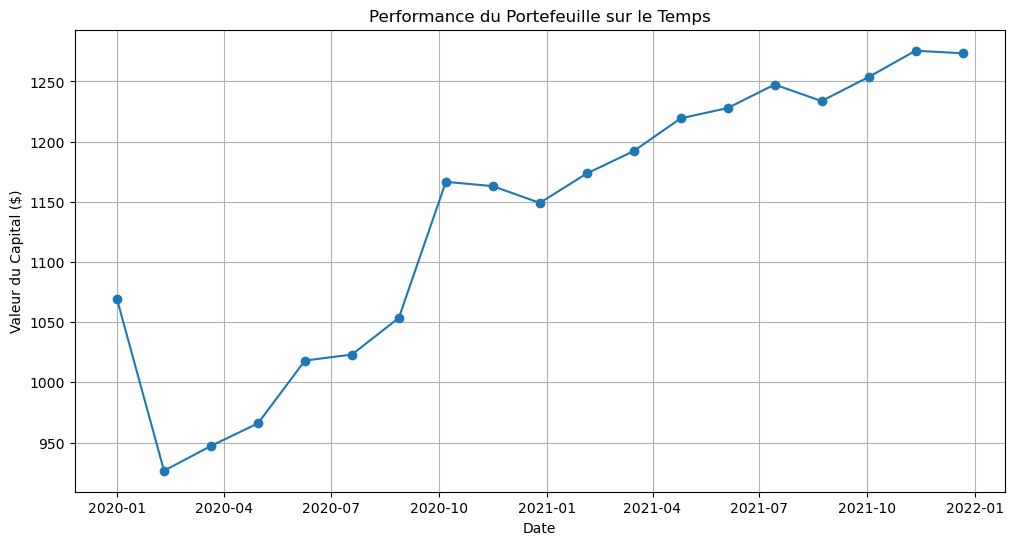

In [58]:
# Simulation d'achat revente : on détermine les dates de début, de fin, la taille de la fenêtre d'investissement, la période qur laquelle on souhaite investir  
# et le seuil au dessus duquel on ne choisira pas les clusters. Ici, on choisit O.1

start_date = '2020-01-01' 
end_date = '2022-01-01'
window_size = 30  # nombre de jours de la période de calcul 
investment_period = 10  # nombre de jours sur lesquels on va investir 
capital_history = []  # Pour enregistrer l'historique du capital
dates = []  # Pour enregistrer les dates correspondantes
risk_free_rate = 0.02 / 252 #Ratio de Sharpe à 2% par an

current_date = pd.to_datetime(start_date)
capital = 1000.0  # On initialise un capital de départ

while current_date < pd.to_datetime(end_date):
    # Période de calcul
    calc_end = current_date + pd.DateOffset(days=window_size) #calcule la dernière date
    calc_data = df.loc[current_date:calc_end] # 90j calculé a partir de date de départ 

    # Matrice d'adjacence de causalité de Granger et les coefficients de clustering : 
    matrix = create_granger_causality_matrix_np(calc_data) #calcule causalité granger sur période de calcul
    clustering_coeffs = clust_corr(matrix) 
    # On sélectionne les actifs a partir de la matrice d'adjacence qui ont un coef inférieur à 0,01 :
    selected_assets = [df.columns[i] for i in range(len(clustering_coeffs[0])) if clustering_coeffs[0][i] < 0.1]

    # Affichage des actifs sélectionnés et de la période de calcul 
    print(f"Période de calcul: {current_date.date()} à {calc_end.date()}, Actifs sélectionnés: {selected_assets}, NB Actifs sélectionnés: {len(selected_assets)}")#on va tej certain actif et garder que eux 

    # Période d'investissement
    investment_start = calc_end #date de début de l'investissement 
    investment_end = investment_start + pd.DateOffset(days=investment_period) #fin de la date d'investissement 
    investment_data = df.loc[investment_start:investment_end, selected_assets] #création de la période d'investissement

    # Répartir le capital uniformément et calculer le rendement
    if len(selected_assets) > 0:
        investment_per_asset = capital / len(selected_assets) #Prix par actif  
        asset_returns = investment_data.iloc[-1] / investment_data.iloc[0]  # Rendement pour chaque actif par rapport à la période d'avant
    
        capital = sum(investment_per_asset * asset_returns)  # Nouveau capital total

    print('gain_actif',asset_returns)
    # Enregistrement de la valeur du capital et de la date
    capital_history.append(capital)
    dates.append(current_date)

    # Affichage du capital après investissement
    print(f"Capital après investissement pour la période {investment_start.date()} à {investment_end.date()}: {capital:.2f}")

    daily_returns = pd.Series(np.diff(capital_history) / capital_history[:-1], index=dates[1:])
    # Calcul des rendements quotidiens pour tous les actifs pendant la période d'investissement
    all_assets_returns = investment_data.pct_change().dropna()
    # Calcul du ratio de Sharpe pour tous les actifs
    all_assets_sharpe_ratio = (all_assets_returns.mean() - risk_free_rate) / all_assets_returns.std()
    print(f"Ratio de Sharpe pour tous les actifs à la période {investment_start.date()} à {investment_end.date()} : {all_assets_sharpe_ratio.values[0]:.2f}")

        # Passer à la période suivante
    current_date = investment_end
    if investment_end > pd.to_datetime(end_date):
        break

print(f"Capital final après backtesting : {capital:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, marker='o')
plt.title('Performance du Portefeuille sur le Temps')
plt.xlabel('Date')
plt.ylabel('Valeur du Capital ($)')
plt.grid(True)
plt.show()

/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-01-01 à 2008-01-31, Actifs sélectionnés: ['AMGN', 'GS', 'ISRG'], NB Actifs sélectionnés: 3
gain_actif Ticker
AMGN    0.999356
GS      0.937459
ISRG    1.183780
dtype: float64
Capital après investissement pour la période 2008-01-31 à 2008-02-10: 1040.20
Ratio de Sharpe pour tous les actifs à la période 2008-01-31 à 2008-02-10 : -0.01


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-02-10 à 2008-03-11, Actifs sélectionnés: ['BKNG', 'CL', 'DE', 'INTC', 'KO', 'NOC'], NB Actifs sélectionnés: 6
gain_actif Ticker
BKNG    1.029864
CL      1.014132
DE      0.924181
INTC    1.025943
KO      1.026400
NOC     0.984312
dtype: float64
Capital après investissement pour la période 2008-03-11 à 2008-03-21: 1041.04
Ratio de Sharpe pour tous les actifs à la période 2008-03-11 à 2008-03-21 : 0.09


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-03-21 à 2008-04-20, Actifs sélectionnés: ['BAC', 'BK', 'CSCO', 'CTSH', 'GILD', 'STZ', 'TJX', 'UPS', 'USB'], NB Actifs sélectionnés: 9
gain_actif Ticker
BAC     0.998139
BK      1.050942
CSCO    1.030133
CTSH    1.026416
GILD    0.993474
STZ     1.000000
TJX     1.011617
UPS     0.998483
USB     1.018635
dtype: float64
Capital après investissement pour la période 2008-04-20 à 2008-04-30: 1055.82
Ratio de Sharpe pour tous les actifs à la période 2008-04-20 à 2008-04-30 : -0.02


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-04-30 à 2008-05-30, Actifs sélectionnés: ['AIG', 'BKNG', 'EL', 'PRU'], NB Actifs sélectionnés: 4
gain_actif Ticker
AIG     0.930278
BKNG    0.940682
EL      0.986555
PRU     0.944445
dtype: float64
Capital après investissement pour la période 2008-05-30 à 2008-06-09: 1003.55
Ratio de Sharpe pour tous les actifs à la période 2008-05-30 à 2008-06-09 : -0.39


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-06-09 à 2008-07-09, Actifs sélectionnés: ['EXC', 'MO', 'REGN', 'ROST'], NB Actifs sélectionnés: 4
gain_actif Ticker
EXC     0.928333
MO      0.975668
REGN    1.157143
ROST    1.038420
dtype: float64
Capital après investissement pour la période 2008-07-09 à 2008-07-19: 1028.53
Ratio de Sharpe pour tous les actifs à la période 2008-07-09 à 2008-07-19 : -0.51


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-07-19 à 2008-08-18, Actifs sélectionnés: ['CVX', 'QCOM', 'SCHW'], NB Actifs sélectionnés: 3
gain_actif Ticker
CVX     1.047962
QCOM    0.975244
SCHW    1.060711
dtype: float64
Capital après investissement pour la période 2008-08-18 à 2008-08-28: 1057.30
Ratio de Sharpe pour tous les actifs à la période 2008-08-18 à 2008-08-28 : 0.34


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-08-28 à 2008-09-27, Actifs sélectionnés: ['ABT', 'EW', 'EXC', 'ISRG', 'MMC', 'NVDA', 'SHW', 'SLB', 'TXN'], NB Actifs sélectionnés: 9
gain_actif Ticker
ABT     0.973519
EW      0.949921
EXC     0.874755
ISRG    0.732936
MMC     0.933140
NVDA    0.716832
SHW     0.928359
SLB     0.888000
TXN     0.906555
dtype: float64
Capital après investissement pour la période 2008-09-27 à 2008-10-07: 928.55
Ratio de Sharpe pour tous les actifs à la période 2008-09-27 à 2008-10-07 : -0.25


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-10-07 à 2008-11-06, Actifs sélectionnés: ['BAX', 'COP', 'CSCO', 'CTSH', 'D', 'JNJ', 'LLY', 'MDLZ', 'NOC', 'SHW', 'SO', 'USB'], NB Actifs sélectionnés: 12
gain_actif Ticker
BAX     1.033414
COP     0.964977
CSCO    0.981110
CTSH    0.906015
D       1.060933
JNJ     1.036775
LLY     0.975358
MDLZ    0.979301
NOC     0.921005
SHW     1.012635
SO      1.042641
USB     0.938280
dtype: float64
Capital après investissement pour la période 2008-11-06 à 2008-11-16: 917.13
Ratio de Sharpe pour tous les actifs à la période 2008-11-06 à 2008-11-16 : 0.18


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-11-16 à 2008-12-16, Actifs sélectionnés: ['ABT', 'AEP', 'BAX', 'BKNG', 'DHR', 'ECL', 'EMR', 'EW', 'ITW', 'MDT', 'MU', 'SLB'], NB Actifs sélectionnés: 12
gain_actif Ticker
ABT     0.987773
AEP     1.060145
BAX     0.996987
BKNG    1.015579
DHR     1.008659
ECL     0.923786
EMR     0.989928
EW      1.041458
ITW     1.033333
MDT     0.977764
MU      1.275862
SLB     0.920476
dtype: float64
Capital après investissement pour la période 2008-12-16 à 2008-12-26: 934.84
Ratio de Sharpe pour tous les actifs à la période 2008-12-16 à 2008-12-26 : -0.19


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2008-12-26 à 2009-01-25, Actifs sélectionnés: ['BSX', 'CCI', 'MDLZ', 'MDT', 'MU', 'NOC', 'ROST', 'SRE', 'SYK', 'TMO', 'VZ', 'WBA'], NB Actifs sélectionnés: 12
gain_actif Ticker
BSX     1.144472
CCI     1.012684
MDLZ    0.905026
MDT     1.025136
MU      1.147059
NOC     0.991720
ROST    0.892857
SRE     1.016246
SYK     1.064712
TMO     1.056711
VZ      0.987738
WBA     1.007463
dtype: float64
Capital après investissement pour la période 2009-01-25 à 2009-02-04: 954.46
Ratio de Sharpe pour tous les actifs à la période 2009-01-25 à 2009-02-04 : 0.71


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-02-04 à 2009-03-06, Actifs sélectionnés: ['AIG', 'AMZN', 'CME', 'DXCM', 'EQIX', 'EXC', 'F', 'INTU', 'NFLX', 'WMT'], NB Actifs sélectionnés: 10
gain_actif Ticker
AIG     2.371429
AMZN    1.085751
CME     1.067525
DXCM    1.217523
EQIX    1.164144
EXC     0.967973
F       1.235294
INTU    1.079208
NFLX    1.012572
WMT     0.997751
dtype: float64
Capital après investissement pour la période 2009-03-06 à 2009-03-16: 1164.36
Ratio de Sharpe pour tous les actifs à la période 2009-03-06 à 2009-03-16 : 0.68


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-03-16 à 2009-04-15, Actifs sélectionnés: ['APD', 'COP', 'MCO', 'MDLZ', 'MMC', 'MNST', 'MS', 'SLB', 'T'], NB Actifs sélectionnés: 9
gain_actif Ticker
APD     1.046998
COP     1.038035
MCO     1.184394
MDLZ    0.973327
MMC     0.991727
MNST    1.113624
MS      0.936460
SLB     1.092247
T       0.988605
dtype: float64
Capital après investissement pour la période 2009-04-15 à 2009-04-25: 1211.63
Ratio de Sharpe pour tous les actifs à la période 2009-04-15 à 2009-04-25 : 0.22


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-04-25 à 2009-05-25, Actifs sélectionnés: ['CL', 'GS', 'MRK', 'MS', 'SO'], NB Actifs sélectionnés: 5
gain_actif Ticker
CL     1.101297
GS     1.052235
MRK    1.000753
MS     1.075121
SO     1.014836
dtype: float64
Capital après investissement pour la période 2009-05-25 à 2009-06-04: 1270.82
Ratio de Sharpe pour tous les actifs à la période 2009-05-25 à 2009-06-04 : 0.62


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-06-04 à 2009-07-04, Actifs sélectionnés: ['BK', 'CMCSA', 'CSX', 'MCHP', 'SYK'], NB Actifs sélectionnés: 5
gain_actif Ticker
BK       1.014104
CMCSA    0.975540
CSX      1.069453
MCHP     1.045535
SYK      0.981529
dtype: float64
Capital après investissement pour la période 2009-07-04 à 2009-07-14: 1292.72
Ratio de Sharpe pour tous les actifs à la période 2009-07-04 à 2009-07-14 : 0.10


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-07-14 à 2009-08-13, Actifs sélectionnés: ['BIIB', 'EMR', 'IBM', 'TGT'], NB Actifs sélectionnés: 4
gain_actif Ticker
BIIB    1.021464
EMR     1.003063
IBM     1.002676
TGT     1.080966
dtype: float64
Capital après investissement pour la période 2009-08-13 à 2009-08-23: 1327.68
Ratio de Sharpe pour tous les actifs à la période 2009-08-13 à 2009-08-23 : 0.37


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-08-23 à 2009-09-22, Actifs sélectionnés: ['AIG', 'EA', 'LLY'], NB Actifs sélectionnés: 3
gain_actif Ticker
AIG    0.940611
EA     0.989201
LLY    0.992066
dtype: float64
Capital après investissement pour la période 2009-09-22 à 2009-10-02: 1293.10
Ratio de Sharpe pour tous les actifs à la période 2009-09-22 à 2009-10-02 : -0.17


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-10-02 à 2009-11-01, Actifs sélectionnés: ['HUM', 'LLY'], NB Actifs sélectionnés: 2
gain_actif Ticker
HUM    1.126993
LLY    1.033480
dtype: float64
Capital après investissement pour la période 2009-11-01 à 2009-11-11: 1396.86
Ratio de Sharpe pour tous les actifs à la période 2009-11-01 à 2009-11-11 : 1.42


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-11-11 à 2009-12-11, Actifs sélectionnés: ['ABT', 'ACN', 'ADSK', 'CDNS', 'CRM', 'DE', 'EL', 'HUM', 'IDXX', 'ILMN', 'MRK', 'MSFT', 'NOC', 'ORCL', 'REGN'], NB Actifs sélectionnés: 15
gain_actif Ticker
ABT     1.002790
ACN     0.967381
ADSK    1.058824
CDNS    0.976549
CRM     1.102118
DE      1.059878
EL      0.973022
HUM     1.076482
IDXX    1.003067
ILMN    1.046881
MRK     1.016725
MSFT    1.022446
NOC     1.019036
ORCL    1.072432
REGN    1.157701
dtype: float64
Capital après investissement pour la période 2009-12-11 à 2009-12-21: 1448.57
Ratio de Sharpe pour tous les actifs à la période 2009-12-11 à 2009-12-21 : 0.07


/opt/mamba/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/tmp/ipykernel_797030/2800597207.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[0, i] = coeff


Période de calcul: 2009-12-21 à 2010-01-20, Actifs sélectionnés: ['AMAT', 'BLK', 'D', 'IBM', 'MMC', 'PLD', 'WM'], NB Actifs sélectionnés: 7
gain_actif Ticker
AMAT    0.882609
BLK     0.897423
D       0.959529
IBM     0.939654
MMC     0.988084
PLD     0.942655
WM      0.950474
dtype: float64
Capital après investissement pour la période 2010-01-20 à 2010-01-30: 1357.61
Ratio de Sharpe pour tous les actifs à la période 2010-01-20 à 2010-01-30 : -0.54
Capital final après backtesting : 1357.61


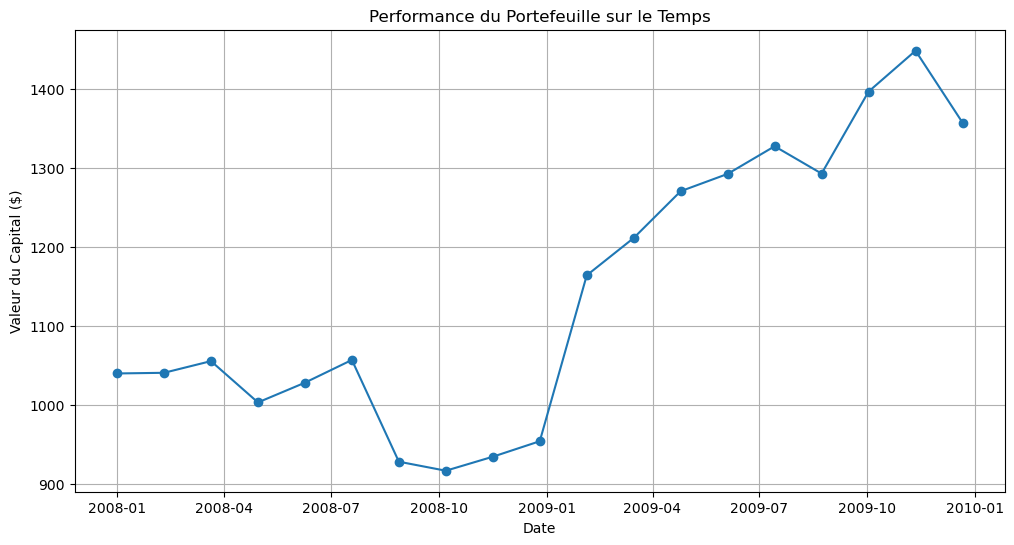

In [56]:
#Période 2020-2022 :

start_date = '2008-01-01' 
end_date = '2010-01-01'
window_size = 30  
investment_period = 10  
capital_history = []  # Pour enregistrer l'historique du capital
dates = []  # Pour enregistrer les dates correspondantes
risk_free_rate = 0.02 / 252

current_date = pd.to_datetime(start_date)
capital = 1000.0  # On initialise un capital de départ

while current_date < pd.to_datetime(end_date):
    calc_end = current_date + pd.DateOffset(days=window_size)
    calc_data = df.loc[current_date:calc_end]

    matrix = create_granger_causality_matrix_np(calc_data)
    clustering_coeffs = clust_corr(matrix)
    selected_assets = [df.columns[i] for i in range(len(clustering_coeffs[0])) if clustering_coeffs[0][i] < 0.1]

    print(f"Période de calcul: {current_date.date()} à {calc_end.date()}, Actifs sélectionnés: {selected_assets}, NB Actifs sélectionnés: {len(selected_assets)}")

    investment_start = calc_end
    investment_end = investment_start + pd.DateOffset(days=investment_period)
    investment_data = df.loc[investment_start:investment_end, selected_assets]

    if len(selected_assets) > 0:
        investment_per_asset = capital / len(selected_assets)
        asset_returns = investment_data.iloc[-1] / investment_data.iloc[0]
        capital = sum(investment_per_asset * asset_returns)

    print('gain_actif', asset_returns)
    capital_history.append(capital)
    dates.append(current_date)

    print(f"Capital après investissement pour la période {investment_start.date()} à {investment_end.date()}: {capital:.2f}")

    daily_returns = pd.Series(np.diff(capital_history) / capital_history[:-1], index=dates[1:])
    all_assets_returns = investment_data.pct_change().dropna()

    all_assets_sharpe_ratio = (all_assets_returns.mean() - risk_free_rate) / all_assets_returns.std()

    print(f"Ratio de Sharpe pour tous les actifs à la période {investment_start.date()} à {investment_end.date()} : {all_assets_sharpe_ratio.values[0]:.2f}")

    current_date = investment_end
    if investment_end > pd.to_datetime(end_date):
        break

print(f"Capital final après backtesting : {capital:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, marker='o')
plt.title('Performance du Portefeuille sur le Temps')
plt.xlabel('Date')
plt.ylabel('Valeur du Capital ($)')
plt.grid(True)
plt.show()


In [57]:
daily_returns = pd.Series(np.diff(capital_history) / capital_history[:-1], index=dates[1:])

# Calcul du ratio de Sharpe
risk_free_rate = 0.02 / 252  # Supposons un taux sans risque de 2% par an
sharpe_ratio = (daily_returns.mean() - risk_free_rate) / daily_returns.std()

# Affichage du ratio de Sharpe
print(f"Ratio de Sharpe : {sharpe_ratio:.2f}")

# Affichage du capital final après backtesting
print(f"Capital final après backtesting : {capital:.2f}")

Ratio de Sharpe : 0.25
Capital final après backtesting : 1357.61


# DEUXIEME METHODE : Random Forest

In [59]:
#Méthode RF :
def create_random_forest_feature_importance_matrix(data_return, lag=1, significance_level=0.1):
    columns = data_return.columns
    n = len(columns)
    adjacency_matrix = np.zeros((n, n), dtype=float)
                        
    for i in range(n):
        data_i = data_return[columns[i]]
        other_assets = [col for col in columns if col != columns[i]]
        data_other_assets = data_return[other_assets].shift(lag).dropna()

        data = pd.concat([data_i, data_other_assets], axis=1)
        X = data.iloc[:, 1:].dropna()
        y = data.iloc[:, 0].drop(data.index[0]).values.ravel()

        model = RandomForestRegressor(n_jobs=-1)
        model.fit(X, y)

        feature_importance = model.feature_importances_

        # Normaliser les données [0, 1] pour ne pas faussé les résultats :
        normalized_importance = (feature_importance - feature_importance.min()) / (feature_importance.max() - feature_importance.min())

        # Mettre le seuil :
        adjacency_matrix[i, :len(normalized_importance)] = (normalized_importance > significance_level).astype(float)
    return adjacency_matrix

Période de calcul: 2008-01-01 à 2008-01-31, Actifs sélectionnés: ['ADBE', 'ADSK', 'AMT', 'BA', 'BAX', 'BDX', 'BLK', 'BMY', 'CAT', 'CDNS', 'CI', 'CL', 'CMCSA', 'CRM', 'CVX', 'DE', 'DIS', 'DLR', 'DUK', 'DXCM', 'EA', 'EMR', 'EQIX', 'EW', 'F', 'GD', 'GE', 'GILD', 'GOOG', 'GS', 'INTC', 'JPM', 'MCO', 'MO', 'MU', 'NOC', 'O', 'PAYX', 'PFE', 'PH', 'PNC', 'ROP', 'SNPS', 'SPGI', 'STZ', 'SYK', 'T', 'TGT', 'TJX', 'TXN', 'UNH', 'UNP', 'USB', 'WM']
Capital après investissement pour la période 2008-01-31 à 2008-02-10: 995.87
Période de calcul: 2008-02-10 à 2008-03-11, Actifs sélectionnés: ['AIG', 'BIIB', 'BK', 'BKNG', 'ECL', 'ETN', 'F', 'ICE', 'ILMN', 'MCD', 'MMC', 'NEE', 'NOC', 'O', 'PGR', 'PLD', 'QCOM', 'SHW']
Capital après investissement pour la période 2008-03-11 à 2008-03-21: 997.27
Période de calcul: 2008-03-21 à 2008-04-20, Actifs sélectionnés: ['ABT', 'AMGN', 'AMZN', 'AON', 'BAX', 'BKNG', 'CAT', 'CB', 'CDNS', 'COST', 'CVX', 'DXCM', 'EW', 'GE', 'HD', 'HON', 'IBM', 'ICE', 'INTU', 'ITW', 'JPM', '

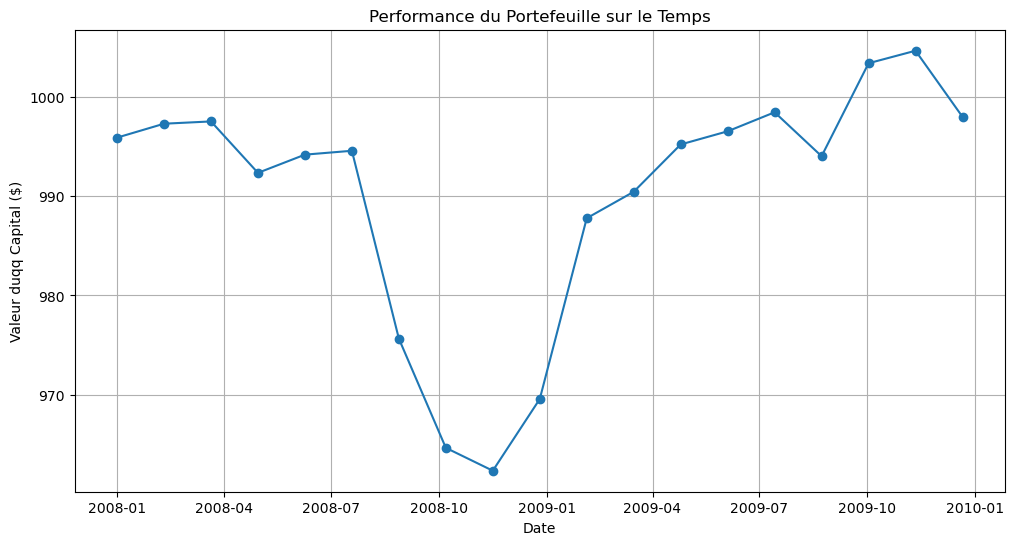

In [62]:
# Période de 2008-2010 :

start_date = '2008-01-01' 
end_date = '2010-01-01'
window_size = 30
investment_period = 10
capital_history = []
dates = []

current_date = pd.to_datetime(start_date)
capital = 1000.0

while current_date < pd.to_datetime(end_date):
    calc_end = current_date + pd.DateOffset(days=window_size)
    calc_data = df.loc[current_date:calc_end]

    adjacency_matrix = create_random_forest_feature_importance_matrix(calc_data, lag=1, significance_level=0.1)

    selected_assets = [df.columns[i] for i in range(len(adjacency_matrix[0])) if adjacency_matrix[0][i] > 0]

    investment_start = calc_end
    investment_end = investment_start + pd.DateOffset(days=investment_period)
    investment_data = df.loc[investment_start:investment_end, selected_assets]

    if not investment_data.empty:
        investment_per_asset = capital / len(selected_assets)
        asset_returns = investment_data.pct_change().fillna(0).mean(axis=1)
        capital = (1 + asset_returns.mean()) * capital

    capital_history.append(capital)
    dates.append(current_date)

    print(f"Période de calcul: {current_date.date()} à {calc_end.date()}, Actifs sélectionnés: {selected_assets}")
    print(f"Capital après investissement pour la période {investment_start.date()} à {investment_end.date()}: {capital:.2f}")

    current_date = investment_end
    if current_date > pd.to_datetime(end_date):
        break

print(f"Capital final après backtesting : {capital:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, marker='o')
plt.title('Performance du Portefeuille sur le Temps')
plt.xlabel('Date')
plt.ylabel('Valeur duqq Capital ($)')
plt.grid(True)
plt.show()

Période de calcul: 2020-01-01 à 2020-01-31, Actifs sélectionnés: ['ACN', 'AON', 'APD', 'AXP', 'BAC', 'BAX', 'BKNG', 'BLK', 'CAT', 'CCI', 'CI', 'CL', 'CME', 'COP', 'COST', 'CSCO', 'DE', 'DHR', 'DIS', 'DUK', 'EMR', 'EW', 'FCX', 'FIS', 'GILD', 'GS', 'ICE', 'INTC', 'LIN', 'LLY', 'MCHP', 'MDLZ', 'MMC', 'MS', 'NOC', 'NVDA', 'O', 'ORCL', 'PEP', 'REGN', 'SCHW', 'SHW', 'SLB', 'SO', 'SYK', 'TJX', 'TXN', 'UPS', 'VZ', 'WBA', 'WMT']
Capital après investissement pour la période 2020-01-31 à 2020-02-10: 1005.20
Période de calcul: 2020-02-10 à 2020-03-11, Actifs sélectionnés: ['ABT', 'ADSK', 'AFL', 'ALGN', 'AMGN', 'AMT', 'BK', 'BSX', 'CDNS', 'CL', 'CME', 'CRM', 'F', 'GD', 'GE', 'GILD', 'GOOG', 'IBM', 'ICE', 'ILMN', 'INTC', 'ISRG', 'LRCX', 'MCD', 'MCO', 'MRK', 'MS', 'PGR', 'PRU', 'SBUX', 'SO', 'TJX', 'TT', 'UNP', 'VZ', 'WMT']
Capital après investissement pour la période 2020-03-11 à 2020-03-21: 985.69
Période de calcul: 2020-03-21 à 2020-04-20, Actifs sélectionnés: ['AAPL', 'ADP', 'ALGN', 'AMZN', 'BAX'

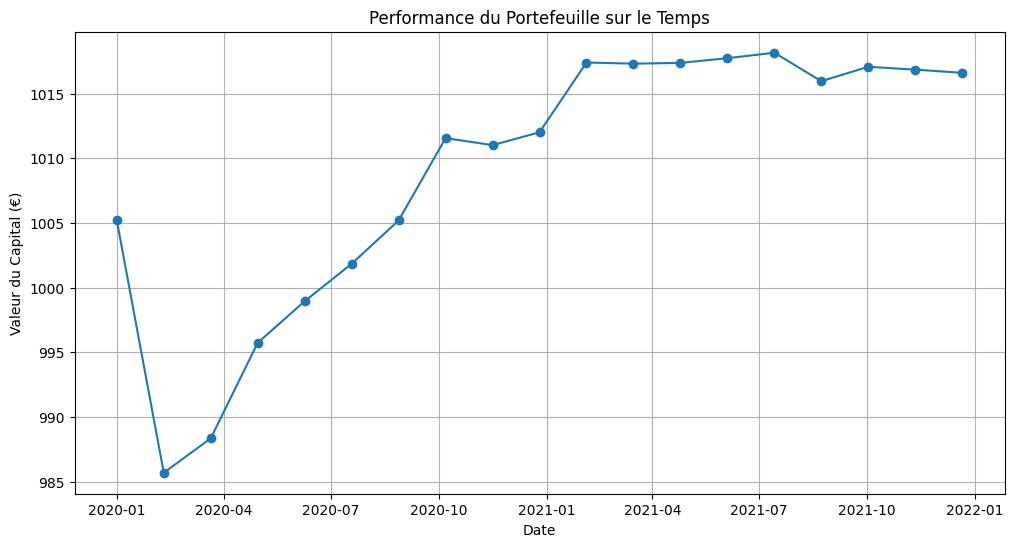

In [ ]:
start_date = '2020-01-01' 
end_date = '2022-01-01'
window_size = 30
investment_period = 10
capital_history = []
dates = []

current_date = pd.to_datetime(start_date)
capital = 1000.0

while current_date < pd.to_datetime(end_date):
    calc_end = current_date + pd.DateOffset(days=window_size)
    calc_data = df.loc[current_date:calc_end]

    adjacency_matrix = create_random_forest_feature_importance_matrix(calc_data, lag=1, significance_level=0.1)

    selected_assets = [df.columns[i] for i in range(len(adjacency_matrix[0])) if adjacency_matrix[0][i] > 0]

    investment_start = calc_end
    investment_end = investment_start + pd.DateOffset(days=investment_period)
    investment_data = df.loc[investment_start:investment_end, selected_assets]

    if not investment_data.empty:
        investment_per_asset = capital / len(selected_assets)
        asset_returns = investment_data.pct_change().fillna(0).mean(axis=1)
        capital = (1 + asset_returns.mean()) * capital

    capital_history.append(capital)
    dates.append(current_date)

    # Affichage des actifs sélectionnés et de la période de calcul
    print(f"Période de calcul: {current_date.date()} à {calc_end.date()}, Actifs sélectionnés: {selected_assets}")
    # Affichage du capital après investissement
    print(f"Capital après investissement pour la période {investment_start.date()} à {investment_end.date()}: {capital:.2f}")

    current_date = investment_end
    if current_date > pd.to_datetime(end_date):
        break

print(f"Capital final après backtesting : {capital:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, marker='o')
plt.title('Performance du Portefeuille sur le Temps')
plt.xlabel('Date')
plt.ylabel('Valeur du Capital (€)')
plt.grid(True)
plt.show()